## PROJECT-  ATTRITION 

#### Problem Statement A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent

More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.


Since you are one of the star analysts at the firm, this project has been given to you.


Goal of the case study You are required to model the probability of attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.


Columns

EmployeeIDEmployee number/id
EnvironmentSatisfactionWork Environment Satisfaction Level

JobSatisfactionJob Involvement Level Job Involvement Level Job Involvement Level

WorkLifeBalanceWork life balance level

# __UNIVARIATE ANALYSIS__

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("general_data.csv")
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [4]:
data.isna().sum()   # WE CAN OBSERVE THAT NumCompaniesWorked     has 19 nan values

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [8]:
# to confirm there are any null values or not
data.isnull().values.any()

True

In [9]:
data_nona = data.dropna()
data_nona

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2


___4410 - 4382 =  25 rows have been dropped due to presence of null values___

In [10]:
data_nona.isnull().values.any()

False

___therefore dataset_nona has no null values now___

.

In [11]:
data_nona.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.0,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,36.933364,9.198996,2.912369,1.0,2207.804884,2.063898,65061.702419,2.693291,15.210634,8.0,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198
std,9.137272,8.105396,1.024728,0.0,1271.688783,1.106115,47142.310175,2.497832,3.663007,0.0,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1108.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2208.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3308.750000,3.000000,83790.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [12]:
data_nona.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [13]:
data_nona['Attrition'].value_counts()

No     3677
Yes     705
Name: Attrition, dtype: int64

In [14]:
data_nona.kurt() 

Age                       -0.409517
DistanceFromHome          -0.230691
Education                 -0.565008
EmployeeCount              0.000000
EmployeeID                -1.198607
JobLevel                   0.388189
MonthlyIncome              0.990836
NumCompaniesWorked         0.014307
PercentSalaryHike         -0.306951
StandardHours              0.000000
StockOptionLevel           0.356755
TotalWorkingYears          0.909316
TrainingTimesLastYear      0.494215
YearsAtCompany             3.930726
YearsSinceLastPromotion    3.592162
YearsWithCurrManager       0.170703
dtype: float64

### Lepokurtic(>0), mesokurtic(0) or platykurtic(<0)

In [166]:
corr_mat=data_nona.corr()
corr_mat

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.158399,0.007376,-0.033900,NaN,0.008105,-0.001137,-0.045163,0.299527,-0.032561,NaN,-0.031504,0.680037,-0.028962,0.311281,0.215650,0.201580
Attrition,-0.158399,1.000000,-0.009449,-0.017106,NaN,-0.004621,-0.012382,-0.030160,0.042831,0.033153,NaN,-0.008164,-0.169670,-0.047586,-0.133003,-0.031423,-0.154692
DistanceFromHome,0.007376,-0.009449,1.000000,-0.007491,NaN,-0.000326,-0.039990,-0.022757,-0.014449,0.037720,NaN,0.009353,0.009574,-0.008957,0.030746,0.002243,0.021773
Education,-0.033900,-0.017106,-0.007491,1.000000,NaN,-0.009389,0.045822,0.007289,-0.016210,-0.041054,NaN,0.002386,-0.009228,0.009939,0.005997,0.023457,0.005645
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008105,-0.004621,-0.000326,-0.009389,NaN,1.000000,-0.003090,0.007865,0.000719,-0.004877,NaN,-0.013488,-0.001688,-0.012102,0.004117,0.000814,0.009079
JobLevel,-0.001137,-0.012382,-0.039990,0.045822,NaN,-0.003090,1.000000,0.046688,-0.009759,0.010874,NaN,0.000365,-0.036293,-0.031931,-0.063360,-0.059680,-0.053898
MonthlyIncome,-0.045163,-0.030160,-0.022757,0.007289,NaN,0.007865,0.046688,1.000000,-0.021446,0.004607,NaN,0.027242,-0.034398,0.049780,0.000088,0.064470,0.023095
NumCompaniesWorked,0.299527,0.042831,-0.014449,-0.016210,NaN,0.000719,-0.009759,-0.021446,1.000000,0.030064,NaN,0.016291,0.238807,-0.031335,-0.117213,-0.035855,-0.109372
PercentSalaryHike,-0.032561,0.033153,0.037720,-0.041054,NaN,-0.004877,0.010874,0.004607,0.030064,1.000000,NaN,0.012104,-0.018480,-0.036720,-0.029022,-0.028654,-0.039687


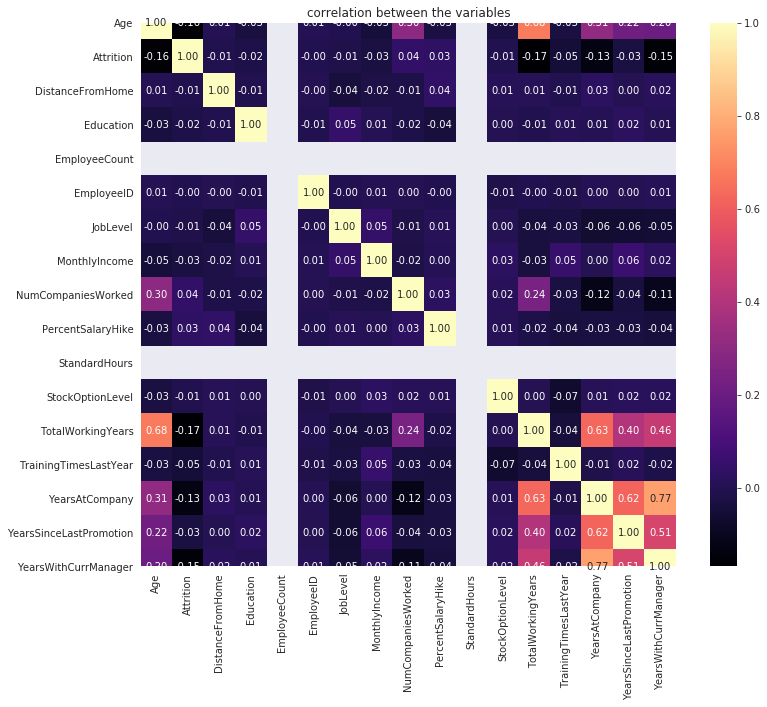

In [179]:
import seaborn as sns

plt.figure(figsize=(12,10))
with sns.axes_style("darkgrid"):
    sns.heatmap(corr_mat,cmap='magma', annot=True, fmt='.2f')
plt.title("correlation between the variables")
plt.show()

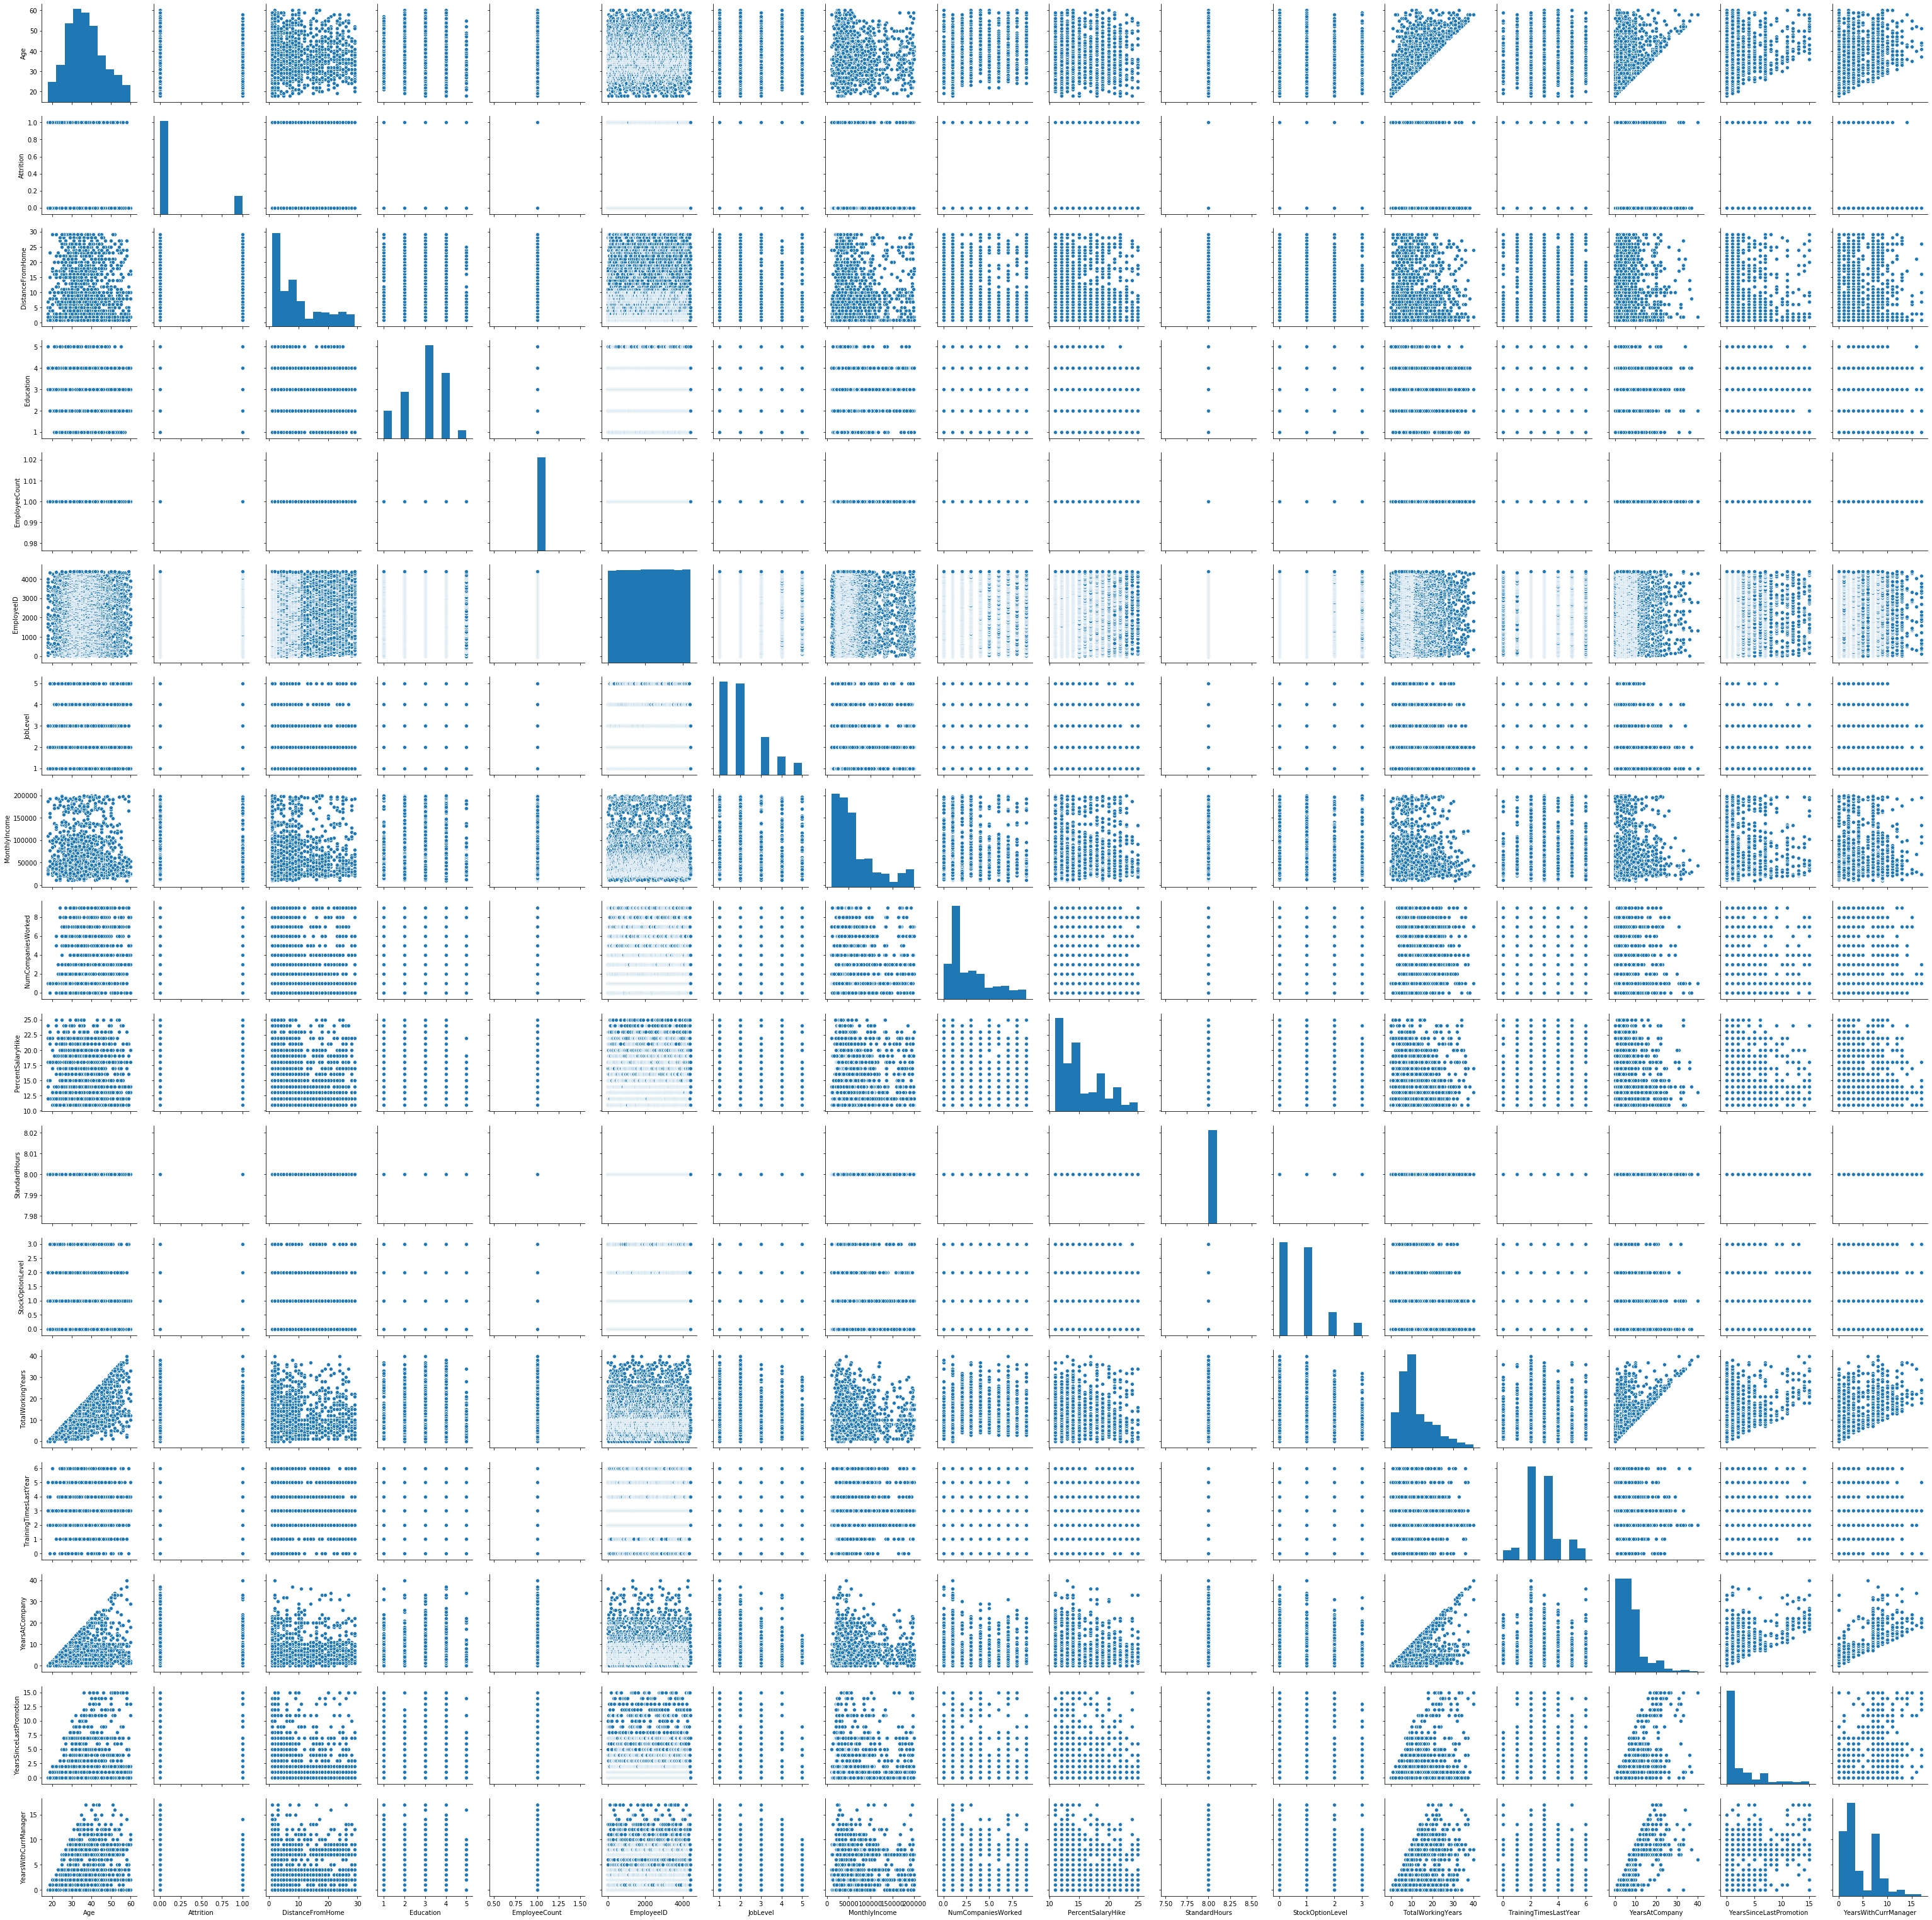

In [183]:
pair_plot = sns.pairplot(data_nona, diag_kind='auto')
pair_plot

In [21]:
data_nona

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,1.0,Y,18,8,0,6.0,2,6,1,5
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2


{'whiskers': [<matplotlib.lines.Line2D at 0x1cb761eb2e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb761eb978>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb76256eb8>],
 'medians': [<matplotlib.lines.Line2D at 0x1cb7621a048>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cb7621a390>],
 'means': []}

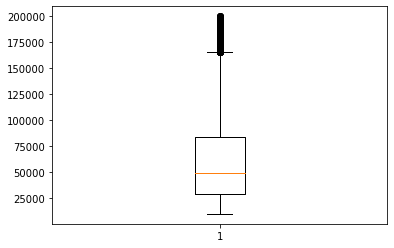

In [22]:
plot1 = data_nona.MonthlyIncome
plt.boxplot(plot1)

####  The MonthlyIncome is positively skewed with a  outliers >1,60,000 as not many have that much Income.

####  The median of the given data  is appx. 50,000 for MonthlyIncome. Meaning 50% of population have income lesss than 50k


{'whiskers': [<matplotlib.lines.Line2D at 0x1cb782dec88>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb782ed3c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb782deb38>],
 'medians': [<matplotlib.lines.Line2D at 0x1cb782eda58>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cb782edda0>],
 'means': []}

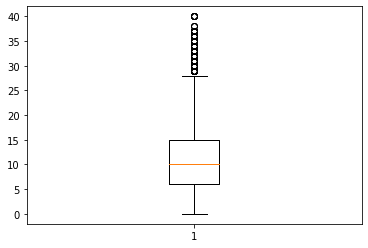

In [23]:
plot1 = data_nona.TotalWorkingYears
plt.boxplot(plot1)

#### There is a balance in the total yeras of experince of the people working. It has almost 0 skewness.

#### the median is 10 years, meaning 50% of population has experience <10 years & of that half of them have experience >5years from Q1

#### Very few people having the experience >25 which are outliers here 


# __FINDING CORRELATION__

## Non Parametric tests

## 1. Chi Square test 

To check the dependencies of variables. Only when variables are ___categorical___

 #### __H0__: There is no dependencies of attrition (Y/N) on gender.
 
 #### __H1__: There is no dependencies of attrition (Y/N) on gender.

In [24]:
from scipy.stats import chi2_contingency

In [25]:
chitable = pd.crosstab(data_nona.Attrition,data_nona.Gender)
stats,p,dof,expected = chi2_contingency(chitable)

In [26]:
print(chitable)
print(stats,p)

Gender     Female  Male
Attrition              
No           1488  2189
Yes           268   437
1.3825823839528295 0.23966176275638887


From the above __p__ value which is __>0.05__ therefore ___Null hypothesis can be accepted___.

Therefore there is No dependency of Attrition(Y/N) on gender.

.

In [28]:
data_yes = pd.read_excel("split_data.xlsx",sheet_name=0)
data_no = pd.read_excel("split_data.xlsx",sheet_name=1)

In [29]:
data_yes.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
1,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
2,47,Yes,Non-Travel,Research & Development,1,1,Medical,1,14,Male,...,1.0,Y,11,8,2,10.0,4,10,9,9


In [30]:
data_no.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
2,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5


.


## 2. Mannwhitneyu test:  

Used to compare two independent samples.

#### __H0__: There is no significant difference in  Attrition (Y) & Attrition(N) wrt to  DistanceFroHome

#### __H1__: There is no significant difference in Attrition (Y) & Attrition(N) wrt to  DistanceFroHome

In [27]:
from scipy.stats import mannwhitneyu

In [31]:
stats,p = mannwhitneyu(data_yes.DistanceFromHome, data_no.DistanceFromHome)
print(stats,p)

1312110.0 0.4629185205822659


Since the value of __p is >0.05__ the ___null hypothesis is accepted___

Therefore, There is no significant difference in Attrition (Y) & Attrition(N) wrt to DistanceFroHome

## Parametric test

A test where Mean, Mode, Median is used to get the inference on data

### a. one Sample T-test

Here comparision of sample mean is done with the population mean 

 ____Assumption mean: Assuming the population mean for monthly salaries is 64000____

#### __H0__ : There is no significant difference between the mean of the salaries of sample against the population mean assumed

#### __H1__ : There is a significant difference between the mean of the salaries of sample against the population mean assumed

from scipy.stats import ttest_1samp

In [34]:
stats,p = ttest_1samp(data_nona.MonthlyIncome,64000)
print(stats,p)

1.490830030837023 0.13607811841579942


From the above p value = 0.13 which is __>0.05__ thus, the ___null hypothesis is accepted___

Therefore,  There is no significant difference between the mean of the salaries of sample against the population mean assumed

.

### b. Sample independent T-test

Here we compare mean of two independent samples

#### __H0__ : There is no significant difference in the mean of YearsAtCompany & YearsWithCurrmanager

#### __H1__ : There is a significant difference in the mean of YearsAtCompany & YearsWithCurrmanager

In [36]:
from scipy.stats import ttest_ind

In [37]:
stats,p = ttest_ind(data_nona.YearsAtCompany, data_nona.YearsWithCurrManager)
print(stats,p)

26.918003609662584 2.0706730342875188e-153


From the above p value which is __<0.05__ thus, the ___null hypothesis is rejected___

Therefore, There is a significant difference in the mean of YearsAtCompany & YearsWithCurrmanager

.

### Between PercentSalaryHike & Total Years of Working

#### __H0__ : There is no significant difference in the mean of PercentSalaryHike & TotalWorkingYears

#### __H1__ : There is a significant difference in the mean of PercentSalaryHike & TotalWorkingYears


In [47]:
from scipy.stats import ttest_ind

In [48]:
stats,p = ttest_ind(data_nona. PercentSalaryHike, data_nona.TotalWorkingYears)
print(stats,p)

30.160819839804933 3.201528290068414e-190


From the above p value which is __<0.05__ thus, the ___null hypothesis is rejected___

Therefore, There is no significant difference in the mean of  PercentSalaryHike & TotalWorkingYears

.

### Encoding of the binary values in Attrition as (1,0) from (Yes, No) respectively


In [60]:
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder as le

In [61]:
from sklearn import preprocessing
Label_encoder = preprocessing.LabelBinarizer()
data_nona['Attrition']=Label_encoder.fit_transform(data_nona['Attrition'])
data_nona.head()

C:\Users\GV62 7RD\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


### 1. Find the correlation between Attrition & DistanceFromHome


__H0__- There is not a significant relationship between Attrition rate & DistanceFromHome

__H1__- There is a significant relationship between Attrition rate & DistanceFromHome

In [65]:
from scipy.stats import pearsonr

In [69]:
stats,p = pearsonr(data_nona.Attrition,data_nona.DistanceFromHome)
print(stats,p)

-0.009448638515156224 0.5317715668019558


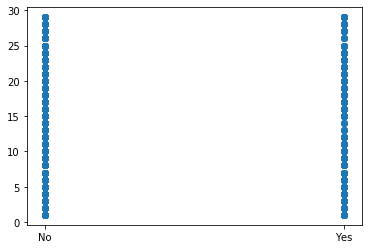

In [70]:
plt.scatter(data.Attrition,data.DistanceFromHome)

From the above values we can see that the 'p' value is __> 0.05__ so the null hypothesis is __accepted__

Therefore, there is no significant relationship between the Attrition rate & DistanceFromHome.

### Attrition v/s Age

__H0__: there is no significant relationship between the Attrition rate & Age.

__H1__: there is a significant relationship between the Attrition rate & Age.

-0.15839867954096665 5.1265982193804103e-26


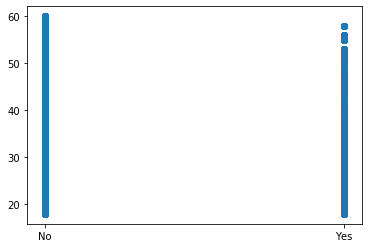

In [73]:
stats,p = pearsonr(data_nona.Attrition,data_nona.Age)

print(stats,p)

plt.scatter(data.Attrition,data.Age)

From the above values we can see that the 'p' value is __< 0.05__ so the null hypothesis is __not accepted__

Therefore, there is a significant relationship between the Attrition rate & Age.

.

### Attrition v/s YearsWithCurrManager

__H0__: There is no correlation between the Attrition & YearsWithCurrManager

__H1__: There is a significant correlation between the Attrition & YearsWithCurrManager

-0.1546915369028727 7.105369646771178e-25


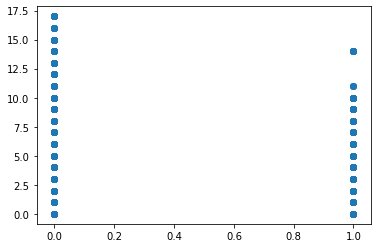

In [75]:
stats,p = pearsonr(data_nona.Attrition, data_nona.YearsWithCurrManager)

print(stats,p)

plt.scatter(data_nona.Attrition, data_nona.YearsWithCurrManager)

##### From above 'p' value which is much less than 0.05, thus the null hypothesi is rejeted

Therefore, there is a significant correlation between Attrition(y/n) & YearsWithCurrManager 

.

#  ANOVA

Used to compare the  sample mean of two or more variables.


In [117]:
import statsmodels.api as sm
from statsmodels.formula.api import ols  # ols: Oridinary Least Square

### one way ANOVA: Attrition vs Businesstravel
__H0__: There is no significance on Attrition due to the Business travel 

__H1__: There is a significance on Attrition due to the Business travel 

In [118]:
model = ols('Attrition~C(BusinessTravel)',data_nona).fit() # Attrition is continious & ~C for categorical, here :BusinessTravel

oneway = sm.stats.anova_lm(model,type=2)   # lm- Linear model, type=1 for Linear regression
                                                            #  type=2 for ANOVA & ANCOVA 
                                                            #  type=3 for Discriminent analysis

print(oneway)

                       df      sum_sq   mean_sq          F        PR(>F)
C(BusinessTravel)     2.0    9.460344  4.730172  35.583018  4.685112e-16
Residual           4379.0  582.115420  0.132933        NaN           NaN


Here Between variation is = 9.46  &  within variation is  = 582.11 

Degree of freedom is 2 (3-1 for three category in business travel column) & 

4397 (number of observation-number of categories (n- C))
    
Calculated F value= 35.58

__p__ value = 4.68*e-16 which is __<0.05__ Therefore the null hypothesis is rejected & Alternate is accepted.

#### Attrition v/s Monthly income

In [133]:
model = ols('Attrition~C(MonthlyIncome)',data_nona).fit() 

oneway1 = sm.stats.anova_lm(model,type=2)  
                                                           
print(oneway1)

                      df      sum_sq  mean_sq          F  PR(>F)
C(MonthlyIncome)  1348.0  540.925764  0.40128  24.029279     0.0
Residual          3033.0   50.650000  0.01670        NaN     NaN


In [135]:
model = ols('Attrition~C(Department)',data_nona).fit() 

oneway2 = sm.stats.anova_lm(model,type=2)  
                                                           
print(oneway2)

                   df      sum_sq   mean_sq          F    PR(>F)
C(Department)     2.0    3.495768  1.747884  13.015209  0.000002
Residual       4379.0  588.079996  0.134296        NaN       NaN


### Two way ANOVA: Attrition vs Businesstravel

__H0__: There is no significance on Attrition due to the Business travel or Gender

__H1__: There is a significance on Attrition due to the Business travel or Gender

In [119]:
model = ols('Attrition~C(BusinessTravel)+C(Gender)',data_nona).fit() # Attrition is continious & ~C for categorical, here :BusinessTravel

twoway = sm.stats.anova_lm(model,type=2)   # lm- Linear model, type=1 for Linear regression
                                                            #  type=2 for ANOVA & ANCOVA 
                                                            #  type=3 for Discriminent analysis

print(twoway)

                       df      sum_sq   mean_sq          F        PR(>F)
C(BusinessTravel)     2.0    9.460344  4.730172  35.589972  4.653463e-16
C(Gender)             1.0    0.246649  0.246649   1.855794  1.731811e-01
Residual           4378.0  581.868772  0.132907        NaN           NaN


From above observation we can see that the __p__ value for Business travel is __<0.05__ therefore it has a significance on Attrition

whereas, __p__ value for Gender is __>0.05__ therefore it doesn't have impact on Attrition.

.

# ANCOVA

In [120]:
model = ols('Attrition~C(EducationField)+C(Department)+MonthlyIncome',data_nona).fit() 

ancova = sm.stats.anova_lm(model,type=2)  
                                                           
print(ancova)

                       df      sum_sq   mean_sq         F        PR(>F)
C(EducationField)     5.0    5.822993  1.164599  8.708497  3.149855e-08
C(Department)         2.0    0.453775  0.226887  1.696592  1.834278e-01
MonthlyIncome         1.0    0.492020  0.492020  3.679168  5.516138e-02
Residual           4373.0  584.806977  0.133731       NaN           NaN


There is a significance on attrition due to Educationalfield & no significance due to department & MonthlyIncome

In [121]:
model = ols('Attrition~C(EducationField)+C(Department)+YearsSinceLastPromotion',data_nona).fit() 

ancova1 = sm.stats.anova_lm(model,type=2)  
                                                           
print(ancova1)

                             df      sum_sq   mean_sq         F        PR(>F)
C(EducationField)           5.0    5.822993  1.164599  8.707393  3.157903e-08
C(Department)               2.0    0.453775  0.226887  1.696377  1.834672e-01
YearsSinceLastPromotion     1.0    0.417911  0.417911  3.124610  7.718804e-02
Residual                 4373.0  584.881086  0.133748       NaN           NaN


Thre is a signifacanct on Attrition due to educational field & no significance due to Years since last promotion & department

## Calculating eta2

In [122]:
def anova_table(oneway):
    oneway['eta_sq'] = oneway[:-1]["sum_sq"]/sum(oneway["sum_sq"])
    cols = ["sum_sq","df","F","PR(>F)","eta_sq"]
    oneway = oneway[cols]
    return oneway;

In [125]:
anova_table(oneway)  #from user defines function anova_table

,sum_sq,df,F,PR(>F),eta_sq
C(BusinessTravel),9.460344,2.0,35.583018,4.685112e-16,0.015992
Residual,582.115420,4379.0,NaN,NaN,NaN


In [126]:
oneway # from the actual value obtained above

,df,sum_sq,mean_sq,F,PR(>F),eta_sq
C(BusinessTravel),2.0,9.460344,4.730172,35.583018,4.685112e-16,0.015992
Residual,4379.0,582.115420,0.132933,NaN,NaN,NaN


In [127]:
anova_table(twoway)

,sum_sq,df,F,PR(>F),eta_sq
C(BusinessTravel),9.460344,2.0,35.589972,4.653463e-16,0.015992
C(Gender),0.246649,1.0,1.855794,1.731811e-01,0.000417
Residual,581.868772,4378.0,NaN,NaN,NaN


Due to business travel there is a 1.59% impact on attrition

In [128]:
anova_table(ancova)

,sum_sq,df,F,PR(>F),eta_sq
C(EducationField),5.822993,5.0,8.708497,3.149855e-08,0.009843
C(Department),0.453775,2.0,1.696592,1.834278e-01,0.000767
MonthlyIncome,0.492020,1.0,3.679168,5.516138e-02,0.000832
Residual,584.806977,4373.0,NaN,NaN,NaN


In [134]:
anova_table(oneway1)

,sum_sq,df,F,PR(>F),eta_sq
C(MonthlyIncome),540.925764,1348.0,24.029279,0.0,0.914381
Residual,50.650000,3033.0,NaN,NaN,NaN


### Here we can see that the MonthlyIncome has a huge impact of 91% on Attrition

In [136]:
anova_table(oneway2)

,sum_sq,df,F,PR(>F),eta_sq
C(Department),3.495768,2.0,13.015209,0.000002,0.005909
Residual,588.079996,4379.0,NaN,NaN,NaN


In [146]:
model = ols('Attrition~C(PercentSalaryHike)',data_nona).fit() 

oneway3 = sm.stats.anova_lm(model,type=2)  
                                                           
print(oneway3)

                          df      sum_sq   mean_sq         F    PR(>F)
C(PercentSalaryHike)    14.0    2.582935  0.184495  1.367913  0.159849
Residual              4367.0  588.992830  0.134874       NaN       NaN


In [147]:
anova_table(oneway3)

,sum_sq,df,F,PR(>F),eta_sq
C(PercentSalaryHike),2.582935,14.0,1.367913,0.159849,0.004366
Residual,588.992830,4367.0,NaN,NaN,NaN


In [154]:
model = ols('Attrition~C(YearsAtCompany)',data_nona).fit() 

oneway4 = sm.stats.anova_lm(model,type=2)  
                                                           
print(oneway4)

                       df      sum_sq   mean_sq         F        PR(>F)
C(YearsAtCompany)    36.0   38.366092  1.065725  8.370378  6.276547e-42
Residual           4345.0  553.209672  0.127321       NaN           NaN


In [155]:
anova_table(oneway4)

,sum_sq,df,F,PR(>F),eta_sq
C(YearsAtCompany),38.366092,36.0,8.370378,6.276547e-42,0.064854
Residual,553.209672,4345.0,NaN,NaN,NaN


### There is an affect of 6.4% on attrition due to Years at company.

In [160]:
model = ols('Attrition~C(YearsSinceLastPromotion)',data_nona).fit() 

oneway5 = sm.stats.anova_lm(model,type=2)  
                     
print(oneway5)

                                df      sum_sq   mean_sq         F  \
C(YearsSinceLastPromotion)    15.0    8.671078  0.578072  4.329802   
Residual                    4366.0  582.904686  0.133510       NaN   

                                  PR(>F)  
C(YearsSinceLastPromotion)  4.072801e-08  
Residual                             NaN  


In [159]:
anova_table(oneway5)

,sum_sq,df,F,PR(>F),eta_sq
C(YearsSinceLastPromotion),8.671078,15.0,4.329802,4.072801e-08,0.014658
Residual,582.904686,4366.0,NaN,NaN,NaN


In [163]:
model = ols('Attrition~C(TotalWorkingYears)',data_nona).fit() 

oneway6 = sm.stats.anova_lm(model,type=2)  
                     
print(oneway6)

                          df      sum_sq   mean_sq         F        PR(>F)
C(TotalWorkingYears)    39.0   48.675044  1.248078  9.981853  2.192297e-56
Residual              4342.0  542.900720  0.125035       NaN           NaN


In [164]:
anova_table(oneway6)

,sum_sq,df,F,PR(>F),eta_sq
C(TotalWorkingYears),48.675044,39.0,9.981853,2.192297e-56,0.08228
Residual,542.900720,4342.0,NaN,NaN,NaN


### People also leaving due to their more number of years of working 8.22%

# CONCLUSIONS 

### 1. There is a significant affect on attrition due to employees Monthly Income which has to be taken care

### 2. Attrition is also in some cases with people having no business trips.

### 3. Few people also leave comany due to their number of years at this company (6.4%)

### 4. People also leaving due to their more number of years of working (8.22%)